# Business understanding- Classify The Shipment Lateness

In this project, I wanted to predict if the shipment is late or not based on mode of shipment, importance of the product, Cost of the Product, Discount Offered and weight of the shipment. I will use dummy variable, machine learning classification algorithm, pandas, numpy, visualization, and training and testing the data set.

Other aim is to <b>build a classification model and predict the lateness in binary form</b>. If we get '0' then the shipment is not on time. If we get the result '1', then the shipment will reach on time.

Hope this model helps the logistics business to predict the shipment. Thus it can make easier to make the decision on which mode to use, what should be price of the shipment, and how much we should give the discount?

## Data Understanding- Importing Libraries

In [2]:
import pandas as pd
import numpy as np
import warnings
import random

I have taken the data from Kaggle and my aim is to predict whether the shipment is reached on time or not. This data has the following columns or attributes:

1. ID:                  Serial number of shipment

2. Warehouse_block:     A, B, C, D warehouse block 

3. Mode_of_Shipment:    Flight, Ship, Road

4. Customer_care_calls:	Integer datatype- Number of times customer called to customer care (Between 2 to 7)

5. Customer_rating:	    Rating for the shipment between 1 and 5

6. Cost_of_the_Product:	Cost of the product to be shipped 

7. Prior_purchases:	    Number of times customer purchased this product

8. Product_importance:  Low, Medium, High

9. Gender:              Male (M) or Female (F)

10. Discount_offered:   Discount in percentage

11. Weight_in_gms:	    Weight of shipment in grams

12. Reached.on.Time:    This is the binary datatype, 1  expresses reached on time and 0 expresses shipment not                             reached on time

In [3]:
raw_data = pd.read_csv('train.csv')

raw_data.head()

,ID,Warehouse_block,Mode_of_Shipment,Customer_care_calls,Customer_rating,Cost_of_the_Product,Prior_purchases,Product_importance,Gender,Discount_offered,Weight_in_gms,Reached.on.Time_Y.N
0,1,D,Flight,4,2,177,3,low,F,44,1233,1
1,2,F,Flight,4,5,216,2,low,M,59,3088,1
2,3,A,Flight,2,2,183,4,low,M,48,3374,1
3,4,B,Flight,3,3,176,4,medium,M,10,1177,1
4,5,C,Flight,2,2,184,3,medium,F,46,2484,1


In [4]:
print('Unique values for the customer rating = ',raw_data.Customer_rating.unique())
print('\n')
print('Unique values for the customer calls = ',raw_data.Customer_care_calls.unique())
print('\n')
print('Unique values of prior purchases = ',raw_data.Prior_purchases.unique())


Unique values for the customer rating =  [2 5 3 1 4]


Unique values for the customer calls =  [4 2 3 5 6 7]


Unique values of prior purchases =  [ 3  2  4  6  5  7 10  8]


In [5]:
raw_data.describe()

,ID,Customer_care_calls,Customer_rating,Cost_of_the_Product,Prior_purchases,Discount_offered,Weight_in_gms,Reached.on.Time_Y.N
count,10999.00000,10999.000000,10999.000000,10999.000000,10999.000000,10999.000000,10999.000000,10999.000000
mean,5500.00000,4.054459,2.990545,210.196836,3.567597,13.373216,3634.016729,0.596691
std,3175.28214,1.141490,1.413603,48.063272,1.522860,16.205527,1635.377251,0.490584
min,1.00000,2.000000,1.000000,96.000000,2.000000,1.000000,1001.000000,0.000000
25%,2750.50000,3.000000,2.000000,169.000000,3.000000,4.000000,1839.500000,0.000000
50%,5500.00000,4.000000,3.000000,214.000000,3.000000,7.000000,4149.000000,1.000000
75%,8249.50000,5.000000,4.000000,251.000000,4.000000,10.000000,5050.000000,1.000000
max,10999.00000,7.000000,5.000000,310.000000,10.000000,65.000000,7846.000000,1.000000


Some descriptive analysis of the data:

Average of the weight in grams: 3634.00 gms (This tells us that people shipped 3.6 KG of material on average.)

Average of the discount offered for shipment: 13.00 ($13 average discount is offered on the shipment)

Average cost of the product is 210.00 (Mean $210 is the cost of the shipment.)

Cost Range is 96 to 310

In [6]:
raw_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10999 entries, 0 to 10998
Data columns (total 12 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   ID                   10999 non-null  int64 
 1   Warehouse_block      10999 non-null  object
 2   Mode_of_Shipment     10999 non-null  object
 3   Customer_care_calls  10999 non-null  int64 
 4   Customer_rating      10999 non-null  int64 
 5   Cost_of_the_Product  10999 non-null  int64 
 6   Prior_purchases      10999 non-null  int64 
 7   Product_importance   10999 non-null  object
 8   Gender               10999 non-null  object
 9   Discount_offered     10999 non-null  int64 
 10  Weight_in_gms        10999 non-null  int64 
 11  Reached.on.Time_Y.N  10999 non-null  int64 
dtypes: int64(8), object(4)
memory usage: 1.0+ MB


In [7]:
df = pd.DataFrame(raw_data)
df

,ID,Warehouse_block,Mode_of_Shipment,Customer_care_calls,Customer_rating,Cost_of_the_Product,Prior_purchases,Product_importance,Gender,Discount_offered,Weight_in_gms,Reached.on.Time_Y.N
0,1,D,Flight,4,2,177,3,low,F,44,1233,1
1,2,F,Flight,4,5,216,2,low,M,59,3088,1
2,3,A,Flight,2,2,183,4,low,M,48,3374,1
3,4,B,Flight,3,3,176,4,medium,M,10,1177,1
4,5,C,Flight,2,2,184,3,medium,F,46,2484,1
...,...,...,...,...,...,...,...,...,...,...,...,...
10994,10995,A,Ship,4,1,252,5,medium,F,1,1538,1
10995,10996,B,Ship,4,1,232,5,medium,F,6,1247,0
10996,10997,C,Ship,5,4,242,5,low,F,4,1155,0
10997,10998,F,Ship,5,2,223,6,medium,M,2,1210,0


## Underrstanding Data- Visualization of the Data

In [8]:
from matplotlib.pyplot import figure
import matplotlib.pyplot as plt
%matplotlib inline

import seaborn as sns

In [9]:
df.head(2)

,ID,Warehouse_block,Mode_of_Shipment,Customer_care_calls,Customer_rating,Cost_of_the_Product,Prior_purchases,Product_importance,Gender,Discount_offered,Weight_in_gms,Reached.on.Time_Y.N
0,1,D,Flight,4,2,177,3,low,F,44,1233,1
1,2,F,Flight,4,5,216,2,low,M,59,3088,1


In [10]:
df.columns

Index(['ID', 'Warehouse_block', 'Mode_of_Shipment', 'Customer_care_calls',
       'Customer_rating', 'Cost_of_the_Product', 'Prior_purchases',
       'Product_importance', 'Gender', 'Discount_offered', 'Weight_in_gms',
       'Reached.on.Time_Y.N'],
      dtype='object')

In [11]:
df.drop(df[['Prior_purchases','Customer_rating']],axis=1)
df.head()

,ID,Warehouse_block,Mode_of_Shipment,Customer_care_calls,Customer_rating,Cost_of_the_Product,Prior_purchases,Product_importance,Gender,Discount_offered,Weight_in_gms,Reached.on.Time_Y.N
0,1,D,Flight,4,2,177,3,low,F,44,1233,1
1,2,F,Flight,4,5,216,2,low,M,59,3088,1
2,3,A,Flight,2,2,183,4,low,M,48,3374,1
3,4,B,Flight,3,3,176,4,medium,M,10,1177,1
4,5,C,Flight,2,2,184,3,medium,F,46,2484,1


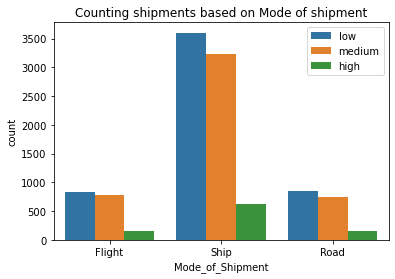

In [12]:
sns.countplot(df['Mode_of_Shipment'],data=df,hue = 'Product_importance')
plt.title('Counting shipments based on Mode of shipment')
plt.legend(loc='upper right')

<b>Above count plot depicts that:</b>

1. Product that are with high importance are shipped through ship.
2. Most of the products with low importance shown in blue bar are shipped also through ship.
3. Flight and road has same number of low and medium priority shipments.

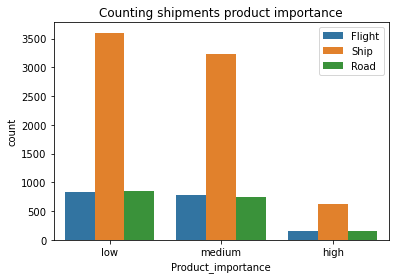

In [13]:
sns.countplot(df['Product_importance'],data=df,hue='Mode_of_Shipment')
plt.title('Counting shipments product importance')
plt.legend(loc='upper right')

<b>
    We can see that most of the products are shipped using water ways/ship.

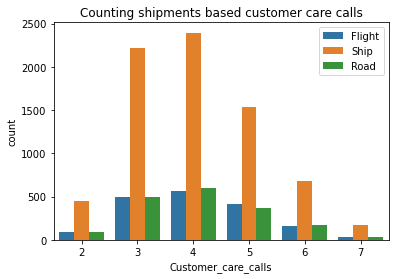

In [14]:
sns.countplot(df['Customer_care_calls'],data=df,hue='Mode_of_Shipment')
plt.title('Counting shipments based customer care calls')
plt.legend(loc='upper right')

<b>Ship has the higher number of calls compared to Road and Flight mode.<br>
<b>Most customers call 4 times while the shipment is being shipped.

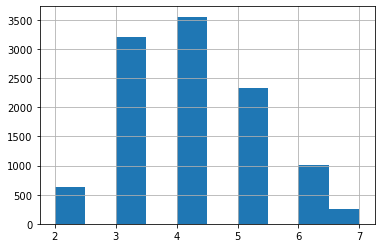

In [15]:
df['Customer_care_calls'].hist(bins=10)

<b>The above histogram depicts 4 calls which are more frequent by customers per shipment.
<br>This tells that customer makes around 4 calls for the shipment, tracking information while the shipment is on move. <br>This is the histogram which is close to Normal Distribution.

In [16]:
df.head()

,ID,Warehouse_block,Mode_of_Shipment,Customer_care_calls,Customer_rating,Cost_of_the_Product,Prior_purchases,Product_importance,Gender,Discount_offered,Weight_in_gms,Reached.on.Time_Y.N
0,1,D,Flight,4,2,177,3,low,F,44,1233,1
1,2,F,Flight,4,5,216,2,low,M,59,3088,1
2,3,A,Flight,2,2,183,4,low,M,48,3374,1
3,4,B,Flight,3,3,176,4,medium,M,10,1177,1
4,5,C,Flight,2,2,184,3,medium,F,46,2484,1


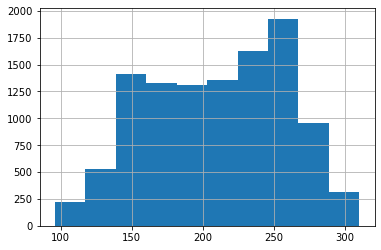

In [17]:
df['Cost_of_the_Product'].hist()

<b>Around 250 dollars is the shipping cost. Most of the shipments are between 100 dollars to 240 dollars.

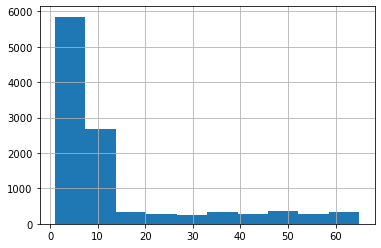

In [18]:
df['Discount_offered'].hist(bins=10)

<b>Most customers got discount between 1 dollar and 15 dollars. <br>There are not many customers who got the discount on the shipment between 20 dollars and 70 dollars. <br>I guess the customers who got the huge discounts are high cost shipments.

In [19]:
df.head()

,ID,Warehouse_block,Mode_of_Shipment,Customer_care_calls,Customer_rating,Cost_of_the_Product,Prior_purchases,Product_importance,Gender,Discount_offered,Weight_in_gms,Reached.on.Time_Y.N
0,1,D,Flight,4,2,177,3,low,F,44,1233,1
1,2,F,Flight,4,5,216,2,low,M,59,3088,1
2,3,A,Flight,2,2,183,4,low,M,48,3374,1
3,4,B,Flight,3,3,176,4,medium,M,10,1177,1
4,5,C,Flight,2,2,184,3,medium,F,46,2484,1


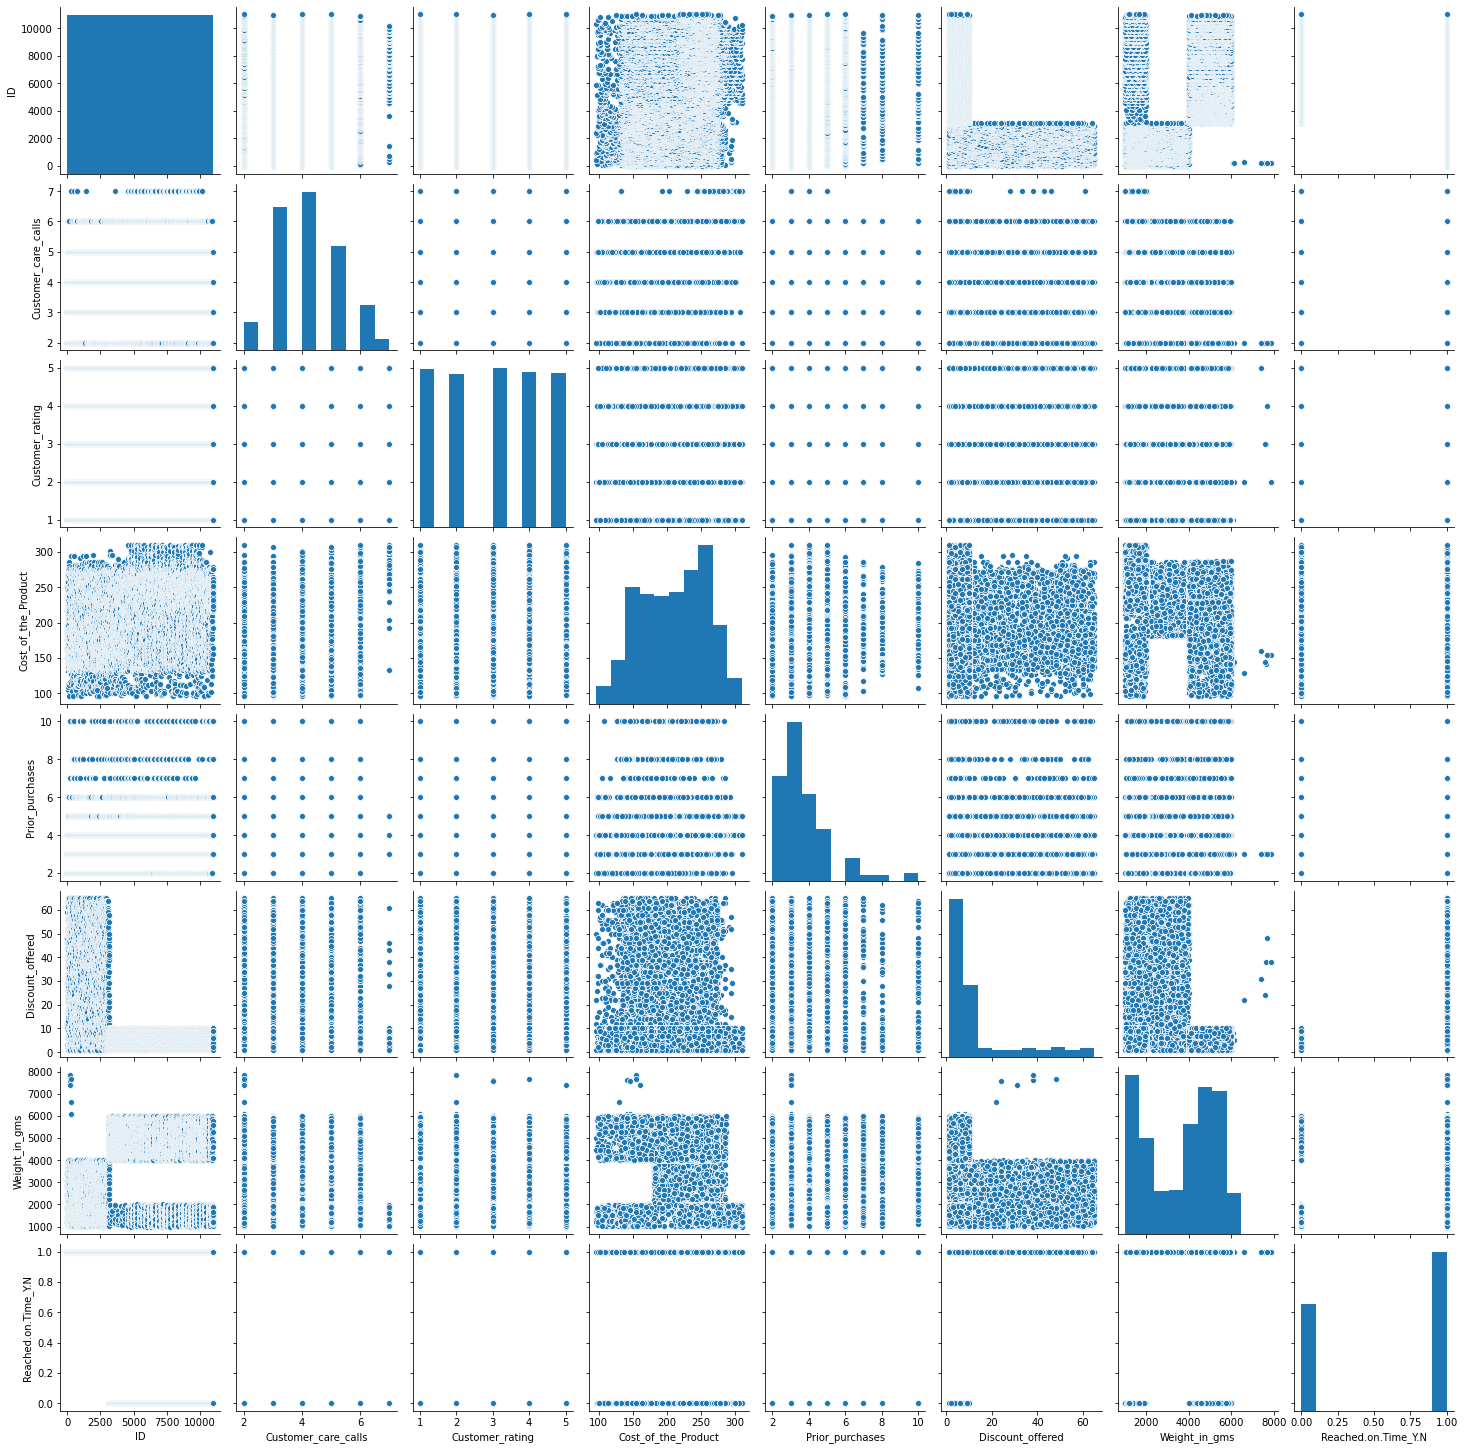

In [20]:
sns.pairplot(df)

This pairplot gives us the overall view of the data. We can see that there is no relation in between the variables. 
For example, we can see that if we offer the discount, there is chance that the shipment will be on time. <b>There is no linear relation between the data </b>. As we have to predict the shipment lateness by 0 or 1, we have to use classification algorithm. 

## Normalizing the data- Normalizing the Mode of Shipments

In [21]:
from sklearn.preprocessing import OneHotEncoder as LabelEncoder

In [22]:
from scipy.stats import norm

In [23]:
norm.mean(raw_data['Weight_in_gms'])

array([1233., 3088., 3374., ..., 1155., 1210., 1639.])

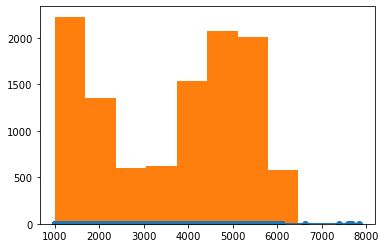

In [24]:
import numpy as np
import scipy.stats as stats
import pylab as pl

h = list(raw_data['Weight_in_gms']) #sorted

fit = stats.norm.pdf(h, np.mean(h), np.std(h))  #this is a fitting indeed

pl.plot(h,fit,'-o')

pl.hist(h)  #use this to draw histogram of your data

pl.show()   

## Data Preparation

In [25]:
df.head()

,ID,Warehouse_block,Mode_of_Shipment,Customer_care_calls,Customer_rating,Cost_of_the_Product,Prior_purchases,Product_importance,Gender,Discount_offered,Weight_in_gms,Reached.on.Time_Y.N
0,1,D,Flight,4,2,177,3,low,F,44,1233,1
1,2,F,Flight,4,5,216,2,low,M,59,3088,1
2,3,A,Flight,2,2,183,4,low,M,48,3374,1
3,4,B,Flight,3,3,176,4,medium,M,10,1177,1
4,5,C,Flight,2,2,184,3,medium,F,46,2484,1


Converting the Mode of shipment and Product importance to numerical values using dummy variables

For example, we will use 0 and 1 combination for different modes (Flight, Ship, and Road).

  

-----------------
   0     1     0 - Flight<br>
   1     0     0 - Road<br>
   0     0     1 - Ship<br>
   

In [26]:
df1 = pd.get_dummies(df['Mode_of_Shipment'],drop_first=True)
df1.head()

,Road,Ship
0,0,0
1,0,0
2,0,0
3,0,0
4,0,0


In [27]:
df2 = pd.get_dummies(df['Product_importance'],drop_first=True)
df2.head()

# High importance is shown by 0 and 0.

,low,medium
0,1,0
1,1,0
2,1,0
3,0,1
4,0,1


In [28]:
df3 = pd.concat([df,df1,df2],axis=1)
df3.head()

,ID,Warehouse_block,Mode_of_Shipment,Customer_care_calls,Customer_rating,Cost_of_the_Product,Prior_purchases,Product_importance,Gender,Discount_offered,Weight_in_gms,Reached.on.Time_Y.N,Road,Ship,low,medium
0,1,D,Flight,4,2,177,3,low,F,44,1233,1,0,0,1,0
1,2,F,Flight,4,5,216,2,low,M,59,3088,1,0,0,1,0
2,3,A,Flight,2,2,183,4,low,M,48,3374,1,0,0,1,0
3,4,B,Flight,3,3,176,4,medium,M,10,1177,1,0,0,0,1
4,5,C,Flight,2,2,184,3,medium,F,46,2484,1,0,0,0,1


## Selecting Algorithm

We will be using classification algorithm for prediction.
There are some algorithms like Random Forest, SVM, and Logistics Regression

## Model building

In [29]:
data = pd.DataFrame(df3.drop(labels = ['Product_importance','Gender','Mode_of_Shipment','ID','Warehouse_block','Customer_care_calls','Customer_rating','Prior_purchases'],axis=1))
data.head()

,Cost_of_the_Product,Discount_offered,Weight_in_gms,Reached.on.Time_Y.N,Road,Ship,low,medium
0,177,44,1233,1,0,0,1,0
1,216,59,3088,1,0,0,1,0
2,183,48,3374,1,0,0,1,0
3,176,10,1177,1,0,0,0,1
4,184,46,2484,1,0,0,0,1


The below mentioned is the important step where we decide the features which will be used to predict the lateness of the shipment. This features include the Cost of shipping, Discount offered, Weight, Mode of the shipment, and product Importance. 

In [30]:
from sklearn.model_selection import train_test_split

X = data.iloc[:,[0,1,2,4,5,6,7]]

y = data.iloc[:,3]

In [31]:
# Features which will be the X in the equation y = f(X)

X.head()

,Cost_of_the_Product,Discount_offered,Weight_in_gms,Road,Ship,low,medium
0,177,44,1233,0,0,1,0
1,216,59,3088,0,0,1,0
2,183,48,3374,0,0,1,0
3,176,10,1177,0,0,0,1
4,184,46,2484,0,0,0,1


In [32]:
# Outcome which will be the y in the equation y = f(X)

y.head()

0    1
1    1
2    1
3    1
4    1
Name: Reached.on.Time_Y.N, dtype: int64

Splitting the data into training and testing set 

In [33]:
# Randomly splits the data into testing and training set
# For example X_train will consists of the 80% of all rows of features
# X_test will consist of the 20% of all rows in the data from features

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

In [34]:
# Features of the data for training (80%) the model 

X_train.head(3)

,Cost_of_the_Product,Discount_offered,Weight_in_gms,Road,Ship,low,medium
8965,178,7,4135,0,1,1,0
5936,202,3,4496,0,1,0,1
10656,277,6,1032,0,1,0,1


In [35]:
# Features of the data for testing (20%) the model 

print(X_test.count(),'rows will be used for testing')

Cost_of_the_Product    2200
Discount_offered       2200
Weight_in_gms          2200
Road                   2200
Ship                   2200
low                    2200
medium                 2200
dtype: int64 rows will be used for testing


In [36]:
# Outcome of the data for training (80% of all rows) the model 

print(y_train.count(),'rows will be used for training')

8799 rows will be used for training


In [37]:
# Number of outcome of the data for training (20% of all rows) the model 

print(y_test.count(),'rows will be used for testing')

2200 rows will be used for testing


## Model training

### Logistic Regression

In [38]:
# This part of the code will train the model using the fit method

from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

lr = LogisticRegression()

modelfit1 = lr.fit(X_train,y_train)

modelfit1.score(X_train,y_train)

# make class predictions for the testing set
y_predicted_logistic_1 = modelfit1.predict(X_test)

### K Nearest Neighbors Classifier

In [39]:
# This part of the code will train the model using the fit method

from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier()

modelfit2 = knn.fit(X_train,y_train)

modelfit2.score(X_train,y_train)

# make class predictions for the testing set
y_pred_knn_2 = modelfit2.predict(X_test)

### Support Vector Machine

In [40]:
# This part of the code will train the model using the fit method

from sklearn.svm import SVC

clf = SVC()

modelfit3 = clf.fit(X_train,y_train)

modelfit3.score(X_train,y_train)

# make class predictions for the testing set
y_pred_class_3 = modelfit3.predict(X_test)

### Decision Tree

In [41]:
# This part of the code will train the model using the fit method
from sklearn import tree 

dtc = tree.DecisionTreeClassifier()

modelfit4 = dtc.fit(X_train,y_train)

# make class predictions for the testing set
y_pred_class_4 = modelfit4.predict(X_test)

I have gathered all the <b>scores</b> below of each model in a table format so that we are able to see it easily and compare.

## Model Evaluation

In [42]:
score_1 = accuracy_score(y_test, y_predicted_logistic_1)

score_2 = accuracy_score(y_test, y_pred_knn_2)

score_3 = accuracy_score(y_test, y_pred_class_3)

score_4 = accuracy_score(y_test, y_pred_class_4)

scores = {'Algorithm': ['Logistic Regression','KNeighborsClassifier','Support Vector Machine','Decision Tree'],
         'Scores': [score_1,score_2,score_3,score_4]}

pd.DataFrame(scores)

,Algorithm,Scores
0,Logistic Regression,0.632273
1,KNeighborsClassifier,0.649091
2,Support Vector Machine,0.672273
3,Decision Tree,0.644091


We can clearly see that <b> SUPPORT VECTOR MACHINE </b> has performed well with <b> 67.22% </b> accuracy. NOT MUCH OF THE DEVIATION BETWEEN THE SCORES OF ALGORITHMS.

## Variables selection 

In this section, we will select attributes which gives us the highest accuracy.

In [47]:
data.columns
data.head()
# We can see that there are 8 columns. We have one outcome column which is "Reached on Time_Y.N"

,Cost_of_the_Product,Discount_offered,Weight_in_gms,Reached.on.Time_Y.N,Road,Ship,low,medium
0,177,44,1233,1,0,0,1,0
1,216,59,3088,1,0,0,1,0
2,183,48,3374,1,0,0,1,0
3,176,10,1177,1,0,0,0,1
4,184,46,2484,1,0,0,0,1


We can play with the variables and see that which set of variables gives higher accuracy.

In [50]:
# In this section, we will select the cost, discount, weight. This will tell us what factors
# are necessary to get the prediction accuracy good.

X1 = data.iloc[:,[0,1,2]]

y1 = data.iloc[:,3]

X_train, X_test, y_train, y_test = train_test_split(X1, y1, test_size=0.20, random_state=42)

lr = LogisticRegression()

m1 = lr.fit(X_train,y_train)

m1.score(X_train,y_train)

# make class predictions for the testing set
y_predicted_1 = m1.predict(X_test)

In [59]:
score = accuracy_score(y_test, y_predicted_1)
score

0.6318181818181818

In [60]:
# In this section, we will select the discount and weight. This will tell us what factors
# are necessary to get the prediction accuracy good.

X2 = data.iloc[:,[1,2]]

y2 = data.iloc[:,3]

X_train, X_test, y_train, y_test = train_test_split(X2, y2, test_size=0.30, random_state=42)

lr = LogisticRegression()

m2 = lr.fit(X_train,y_train)

m2.score(X_train,y_train)

# make class predictions for the testing set
y_predicted_2 = m2.predict(X_test)

In [62]:
score = accuracy_score(y_test, y_predicted_2)
score

0.6321212121212121

In [ ]:
# In this section, we will select the discount and weight. This will tell us what factors
# are necessary to get the prediction accuracy good.

X2 = data.iloc[:,[1,2]]

y2 = data.iloc[:,3]

X_train, X_test, y_train, y_test = train_test_split(X2, y2, test_size=0.30, random_state=42)

lr = LogisticRegression()

m2 = lr.fit(X_train,y_train)

m2.score(X_train,y_train)

# make class predictions for the testing set
y_predicted_2 = m2.predict(X_test)